In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
path = 'yelp_data/health_text_sentiment.csv'

In [4]:
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,stars,text,sent_value,sent_score,clean_text,sent_value_clean,sent_score_clean
0,1,Please stay away from this place if you can! I...,-0.050645,negative,please stay away place bad care imaginable sta...,-0.036719,negative
1,5,My husband has been a patient of Dr. Byrne for...,0.024962,positive,husband patient dr byrne last year half last m...,0.069479,positive
2,4,Dr. Byrne is a great doctor! She has great bed...,0.513333,positive,dr byrne great doctor great bed side manner ex...,0.317778,positive
3,3,I'm raising my review as Dr Bryne's has been m...,-0.035714,negative,raise review dr bryne receptive daughter go an...,0.002806,positive
4,1,I wish I could give 0 stars. Worst office I've...,-0.048246,negative,wish could give star bad office ever horrible ...,-0.084259,negative


In [5]:
df = df[['stars','text']]

In [6]:
df.head()

,stars,text
0,1,Please stay away from this place if you can! I...
1,5,My husband has been a patient of Dr. Byrne for...
2,4,Dr. Byrne is a great doctor! She has great bed...
3,3,I'm raising my review as Dr Bryne's has been m...
4,1,I wish I could give 0 stars. Worst office I've...


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

In [7]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
data.stars.replace(1,0,inplace=True)
data.stars.replace(5,1,inplace=True)

In [8]:
data.head()

,stars,text
0,0,Please stay away from this place if you can! I...
1,1,My husband has been a patient of Dr. Byrne for...
4,0,I wish I could give 0 stars. Worst office I've...
5,0,I went to the emergency room because i was hav...
6,1,Dr. Byrne is an excellent doctor with all the ...


In [13]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split?

In [ ]:
review = data['clean_text'].values.astype(str)
sentiments = data['stars'].values

In [ ]:
sentiments[0:10]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review, sentiments, test_size=0.33, random_state=42)

In [ ]:
from sklearn.svm import LinearSVC

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)

## OHTER


In [14]:
%%time
review = data['text'].values.astype(str)
sentiments = data['stars'].values

CPU times: user 203 ms, sys: 1.75 s, total: 1.95 s
Wall time: 2 s


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2))

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(review)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(vectors, sentiments,
 test_size=0.33, random_state=42)

In [17]:
from sklearn.svm import LinearSVC

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [18]:
preds = classifier.predict(X_test)

In [19]:
feature_names = np.array(vectorizer.get_feature_names())
sorted_coef_index = classifier.coef_[0].argsort()

print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

Smallest Coef: 
['rude' 'not' 'told' 'horrible' 'worst' 'unprofessional' 'terrible' 'said'
 'never' 'no']

Largest Coef: 
['great' 'amazing' 'best' 'love' 'awesome' 'thank' 'dr' 'friendly' 'and'
 'excellent']



# plot

In [20]:
#https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

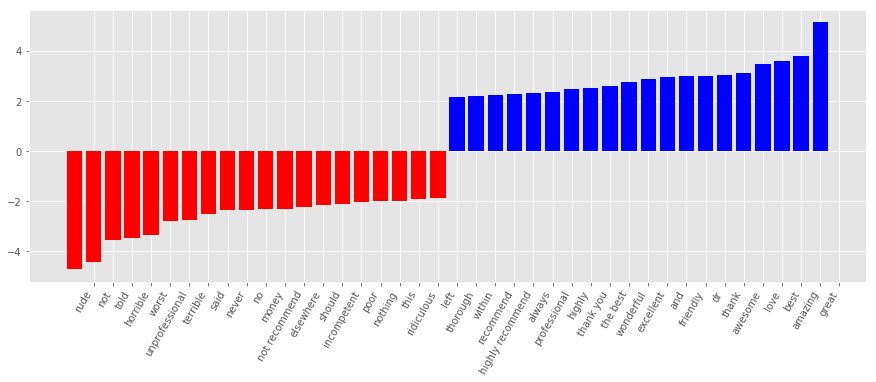

In [21]:
plot_coefficients(classifier, vectorizer.get_feature_names())

# evaluate

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.9813268644928353


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98      7241
          1       0.99      0.98      0.98     10485

avg / total       0.98      0.98      0.98     17726



In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[ 7097   144]
 [  187 10298]]


## Try All star revies

In [25]:
data2 = df.copy()

In [26]:
%%time
review = data2['text'].values.astype(str)
sentiments = data2['stars'].values

CPU times: user 375 ms, sys: 1.84 s, total: 2.22 s
Wall time: 2.23 s


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2))

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(review)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(vectors, sentiments,
 test_size=0.33, random_state=42)

In [29]:
%%time
from sklearn.svm import LinearSVC

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)


CPU times: user 12.6 s, sys: 156 ms, total: 12.7 s
Wall time: 12.7 s


In [30]:
preds = classifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.8323548906353565


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          1       0.81      0.97      0.88      7239
          2       0.40      0.07      0.12      1242
          3       0.46      0.06      0.11       768
          4       0.47      0.15      0.22      1439
          5       0.87      0.98      0.92     10434

avg / total       0.78      0.83      0.79     21122



In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[ 7028    49    10    19   133]
 [  983    91    24    31   113]
 [  349    61    46   105   207]
 [  153    24    15   211  1036]
 [  140     4     4    81 10205]]


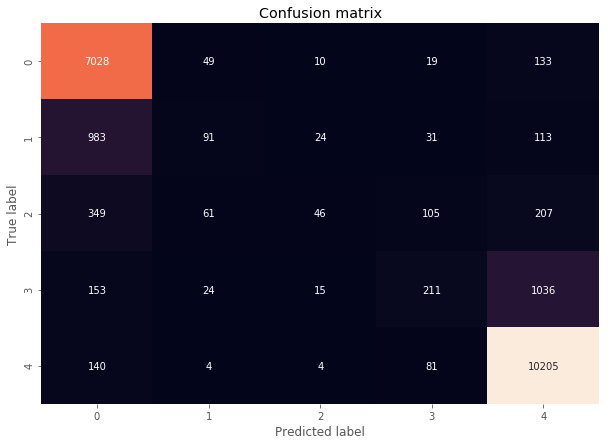

In [34]:
cm = confusion_matrix(y_test, preds)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()